# **Iris Flower Classification**

## **Introduction**

The Iris flower dataset is a classic in the realm of machine learning, comprising measurements of three species: setosa, versicolor, and virginica. By leveraging features like sepal and petal measurements, our goal is to train a machine learning model capable of accurately classifying Iris flowers into their respective species.

### **Dataset**

The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for each Iris flower sample, along with the corresponding species label.

## **Conclusion**

In conclusion, our project successfully developed a machine learning model for Iris flower classification. By utilizing the Iris dataset and employing classification algorithms, we achieved accurate predictions of Iris species based on their sepal and petal measurements. This project demonstrates the effectiveness of machine learning in classifying botanical species and serves as a foundational example for introductory classification tasks.


In [31]:
#Import Libraries for data processing and modelling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [32]:
iris = pd.read_csv('IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [34]:
iris.shape

(150, 5)

In [35]:
#Checking the null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [36]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
#importing libraries used for encoding

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [39]:
for i in iris.columns:
    if is_numeric_dtype(iris[i]):
        continue
    else:
        iris[i] = le.fit_transform(iris[i])

In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


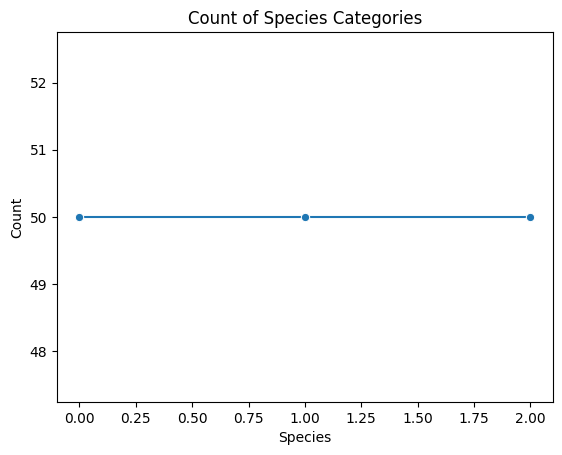

In [41]:
# Get the unique species categories and their counts
species_counts = iris['species'].value_counts().sort_index()

# Create a line chart to show the count of species category
sns.lineplot(x=species_counts.index, y=species_counts.values, marker='o')

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Species Categories')

# Show the plot
plt.show()

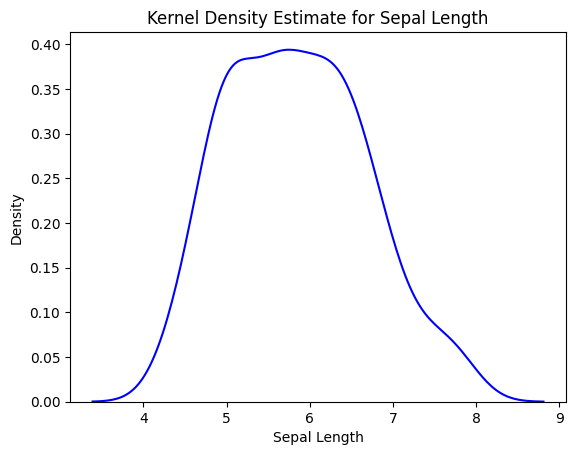

In [42]:
# Create a line chart with KDE curve for sepal_length data
sns.kdeplot(data=iris, x='sepal_length', color='blue')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.title('Kernel Density Estimate for Sepal Length')

# Show the plot
plt.show()

<Axes: xlabel='sepal_width', ylabel='Count'>

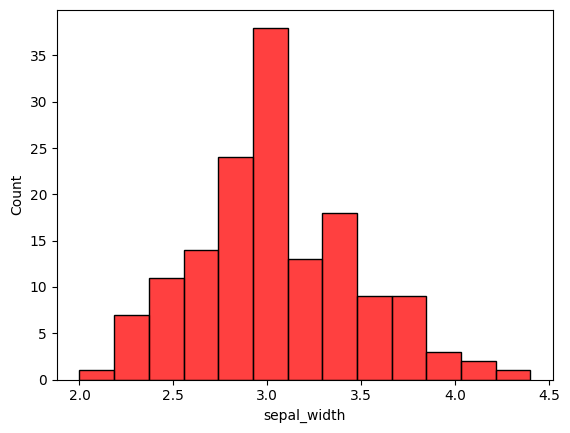

In [43]:
#Built a histogram for sepal_width data to know the relation

sns.histplot(data = iris , x = iris.sepal_width ,color = 'red')

<Axes: xlabel='petal_length', ylabel='Count'>

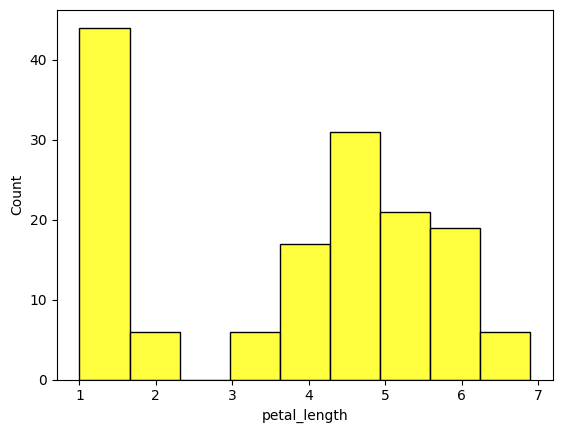

In [44]:
#Built a histogram for petal_length data to know the relation

sns.histplot(data = iris , x = iris.petal_length ,color = 'yellow')

<Axes: xlabel='petal_width', ylabel='Count'>

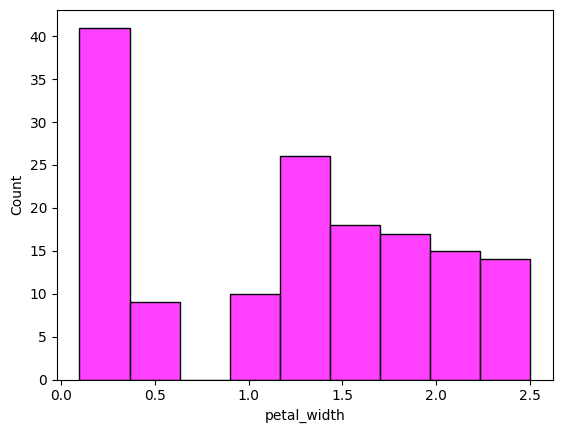

In [45]:
#Built a histogram for petal_width data to know the relation

sns.histplot(data = iris , x = iris.petal_width ,color = 'magenta')

<Axes: >

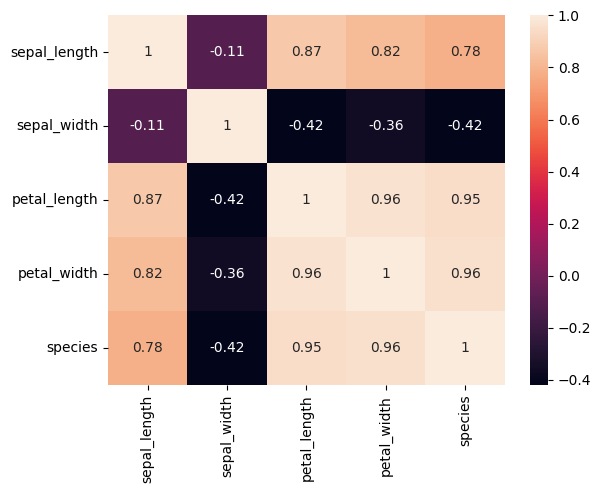

In [46]:
#Created a heatmap to see the feature-wise correlation in the dataset

corr = iris.corr()
sns.heatmap(corr, annot = True)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [49]:
# Assigning the predictor and target variable

X = iris.drop(['species'],axis=1)
y = iris.species

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [51]:
# Importing essential libraries for model building

from sklearn.linear_model import LogisticRegression

In [52]:
# Building machine learning model and training them

Model = LogisticRegression()
Model.fit(X_train,y_train)

LogisticRegression()

In [53]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model.score(X_train, y_train))
print("Score for Test data",Model.score(X_test, y_test))

Score for Train data 0.9619047619047619
Score for Test data 0.9777777777777777


In [54]:
# Importing essential libraries for Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Building machine learning model and training them

Model2 = RandomForestClassifier(n_estimators = 300 , random_state=100)
Model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [55]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model2.score(X_train, y_train))
print("Score for Test data",Model2.score(X_test, y_test))

Score for Train data 1.0
Score for Test data 0.9555555555555556


In [56]:
# knn k-nearest neigbours
from sklearn.neighbors import KNeighborsClassifier

# Building machine learning model and training them

Model3 = KNeighborsClassifier()
Model3.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model3.score(X_train, y_train))
print("Score for Test data",Model3.score(X_test, y_test))

Score for Train data 0.9523809523809523
Score for Test data 0.9777777777777777


In [58]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



### Comparison and Conclusion

- **Accuracy:** Logistic Regression and Random Forest both achieved an accuracy of 97%, while K-Nearest Neighbors (KNN) achieved 95%.
- **Precision, Recall, and F1-Score:** Logistic Regression and Random Forest showed very similar and high performance metrics across all classes, with perfect scores for some classes. KNN showed slightly lower precision and recall for class 2.
- **Consistency:** Logistic Regression provided consistent results across all metrics, making it the best performer overall, slightly edging out Random Forest due to its simplicity and interpretability.

### Conclusion

Based on the above results, **Logistic Regression** outperformed Random Forest and K-Nearest Neighbors on the Iris flower dataset in terms of accuracy and other classification metrics. Despite the Random Forest having competitive performance, Logistic Regression's simpler model and consistently high performance make it the preferred choice for this classification task.




In [59]:
# For testing, We create a new dataframe with values close to the any of our existing data to evaluate.

data = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data)

In [60]:
# Predict the movie rating by entered data
result = Model.predict(trail)

# Display the predicted result from the Model
print("Result Species:", result[0])

Result Species: 0
